In [ ]:
import random
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

data_path = r"data"
imaging_path = os.path.join(data_path, "imaging")
subset_path = os.path.join(data_path, "imaging_subset")

filenames = os.listdir(imaging_path)

In [31]:
# get random subset with even amount of slobe and llobe
slobe_files = [f for f in filenames if 'slobe' in f.lower()]
llobe_files = [f for f in filenames if 'llobe' in f.lower()]
random_slobe = random.sample(slobe_files, 10)
random_llobe = random.sample(llobe_files, 10)
random_subset = random_slobe + random_llobe
# copy images over to imaging_subset folder

if input("copy images to imaging_subset folder? (y/n): ") == 'y':
    os.makedirs(subset_path, exist_ok=True)
    # make sure no existing files exist
    if os.listdir(subset_path):
        if input("imaging_subset folder is not empty. continue? this will replace the folder. (y/n): ") != 'y':
            raise Exception("imaging_subset folder is not empty")
        # wipe the folder
        for f in os.listdir(subset_path):
            os.remove(os.path.join(subset_path, f))
    for f in random_subset:
        src = os.path.join(imaging_path, f)
        dst = os.path.join(subset_path, f)
        if not os.path.exists(dst):
            os.system(f'cp "{src}" "{dst}"')
            print(f"Copied {f} to imaging_subset folder.")
        else:
            print(f"{f} already exists in imaging_subset folder.")
else:
    print("images not copied.")

Copied MASK_SK658 Slobe ch010063.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010140.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010113.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010111.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010147.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010104.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010048.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010146.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010096.jpg to imaging_subset folder.
Copied MASK_SK658 Slobe ch010103.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010067.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010061.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010071.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010040.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010031.jpg to imaging_subset folder.
Copied MASK_Sk658 Llobe ch010030.jpg to imaging_subset 

In [ ]:
images_subset = pd.DataFrame()

data_path = r"data"
imaging_path = os.path.join(data_path, r"imaging_subset")
filenames = os.listdir(imaging_path)
depths = pd.read_csv(os.path.join(data_path, "depths.csv"))

for i in filenames:
    img = cv2.imread(os.path.join(imaging_path, i), 0)
    try:
        depth = depths[depths["Filenames"].str.lower() == i.lower()][
            "Depth from lung surface (in micrometers) where image was acquired"
        ].values[0]
        # some files are named with SK658 and some with Sk658
    except IndexError:
        print(f"couldn't find depth for file {i}")
        continue
    images_subset = pd.concat(
        [images_subset, pd.DataFrame([{"filename": i, "image": img, "depth": depth}])],
        ignore_index=True,
    )

print(images_subset.shape)

(20, 3)


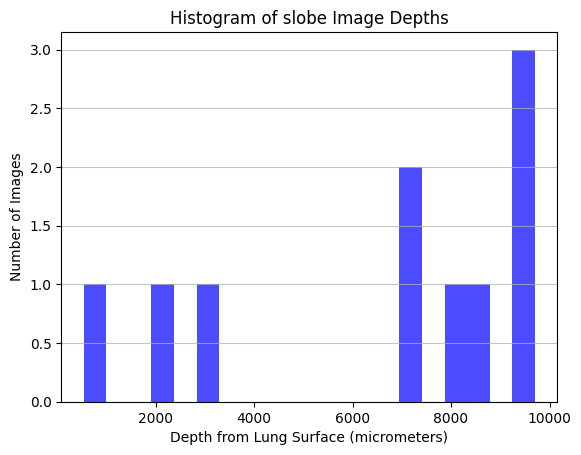

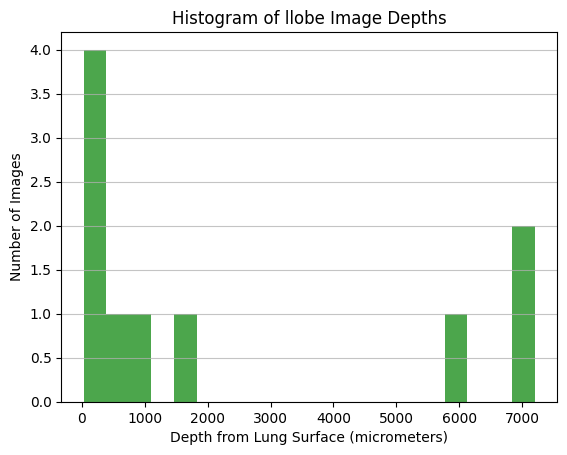

In [33]:
# plot the depths of all images of both groups

slobe_images = images_subset[images_subset["filename"].str.contains("slobe", case=False)]
llobe_images = images_subset[images_subset["filename"].str.contains("llobe", case=False)]

plt.hist(slobe_images["depth"], bins=20, color="blue", alpha=0.7)
plt.title("Histogram of slobe Image Depths")
plt.xlabel("Depth from Lung Surface (micrometers)")
plt.ylabel("Number of Images")
plt.grid(axis="y", alpha=0.75)
plt.show()
plt.close("all")


plt.hist(llobe_images["depth"], bins=20, color="green", alpha=0.7)
plt.title("Histogram of llobe Image Depths")
plt.xlabel("Depth from Lung Surface (micrometers)")
plt.ylabel("Number of Images")
plt.grid(axis="y", alpha=0.75)
plt.show()
plt.close("all")